## Investigating the seasonal forcing function
From Aguiar et al (2017):
$$
\beta(t) = \beta(1+ \eta \cos(\omega t))
$$

With my slight modifications:
$$
\beta(t) = \beta_0 (1 + \beta_1 cos(\omega t + \phi))
$$

In [11]:
# Seasonal forcing function

import numpy as np
import matplotlib.pyplot as plt

def seasonal_forcing(beta_0, beta_1, omega, psi, t):
    """
    Calculate the seasonal forcing function.
    
    Parameters:
    - beta0: baseline value
    - beta1: amplitude of the seasonal fluctuation
    - omega: angular frequency (radians/year)
    - psi: phase shift (in days)
    - t: time (in days, can be an array)
    
    Returns:
    - The calculated seasonal forcing values at time t.
    """
    return beta_0 * (1 + beta_1 * np.cos(omega * (t/365) + (2*np.pi*psi/365)))



## Plotting the function with varying $\beta_0$

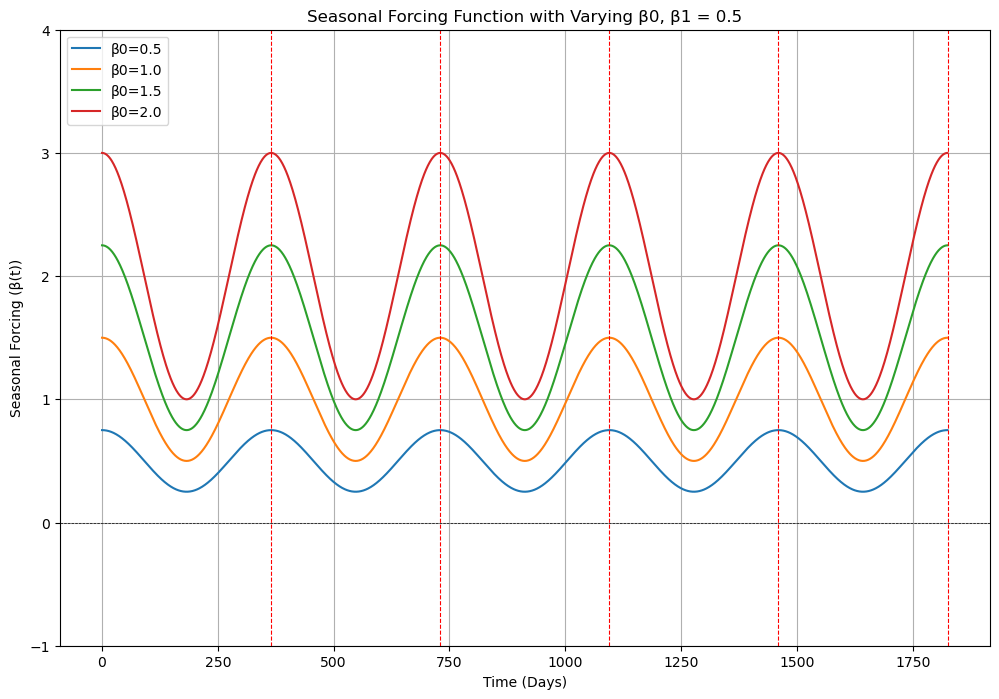

In [12]:
# Define time over one year in days (e.g., 0 to 365 days)
t = np.linspace(0, 365*5, 365*5)  # 365 days

# Set constant parameters
beta1 = 0.5
omega = 2 *np.pi  # Angular frequency - yearly
psi = 0  # No phase shift

# Varying beta0
beta0_values = [0.5, 1.0, 1.5, 2.0]  # Different baseline values

# Create a plot
plt.figure(figsize=(12, 8))

# Plot seasonal forcing functions for different beta0 values
for beta0 in beta0_values:
    forcing = seasonal_forcing(beta0, beta1, omega, psi, t)
    plt.plot(t, forcing, label=f"β0={beta0}")

# Add vertical lines at multiples of 365
for year in range(1, 6):  # For 1 to 5 years
    plt.axvline(x=year * 365, color='red', linestyle='--', linewidth=0.8)


# Customizing the plot
plt.title('Seasonal Forcing Function with Varying β0, β1 = 0.5')
plt.xlabel('Time (Days)')
plt.ylabel('Seasonal Forcing (β(t))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid()
plt.ylim(-1, 4)
plt.show()

## Varying $\beta_1$ 
$\beta_1$ controls the forcing (amplitude) of seasonality, with $\beta_1$ = 0 there is no seasonality. This parameter is bound between [0,1] (to ensure positive values for the cos function).

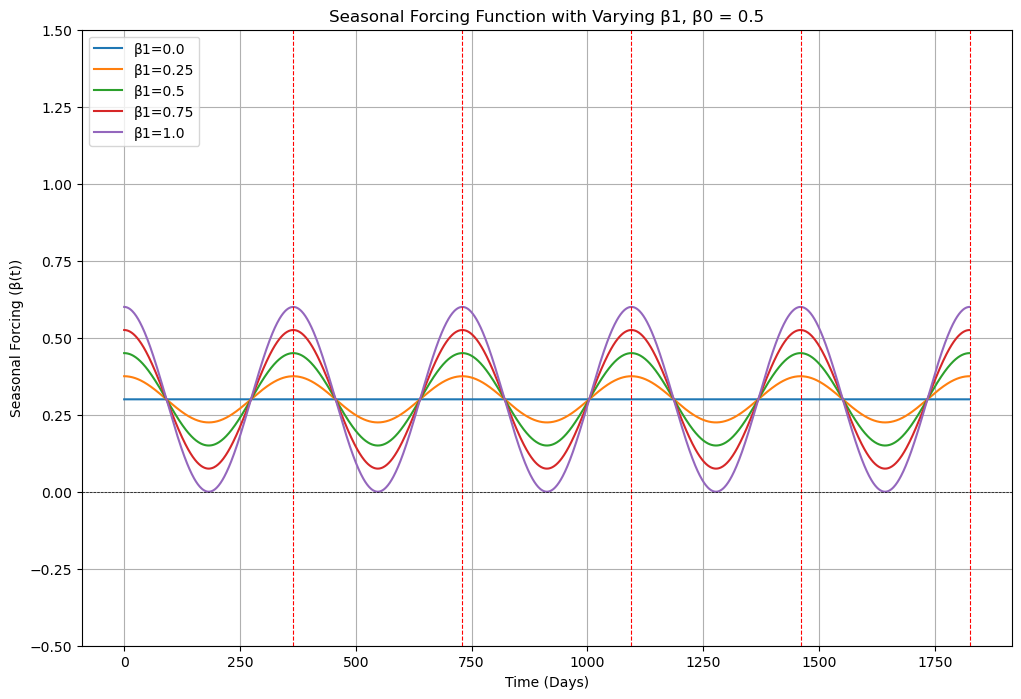

In [13]:
# Define time over one year in days (e.g., 0 to 365 days)
t = np.linspace(0, 365*5, 365*5)  # 365 days

# Set constant parameters
beta0 = 0.3
omega = 2 *np.pi  # Angular frequency - yearly
psi = 0  # No phase shift

# Varying beta0
beta1_values = [0.0, 0.25, 0.5, 0.75, 1.0]  # Different baseline values

# Create a plot
plt.figure(figsize=(12, 8))

# Plot seasonal forcing functions for different beta0 values
for beta1 in beta1_values:
    forcing = seasonal_forcing(beta0, beta1, omega, psi, t)
    plt.plot(t, forcing, label=f"β1={beta1}")

# Add vertical lines at multiples of 365
for year in range(1, 6):  # For 1 to 5 years
    plt.axvline(x=year * 365, color='red', linestyle='--', linewidth=0.8)


# Customizing the plot
plt.title('Seasonal Forcing Function with Varying β1, β0 = 0.5')
plt.xlabel('Time (Days)')
plt.ylabel('Seasonal Forcing (β(t))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid()
plt.ylim(-0.5, 1.5)
plt.show()

## Varying the frequency of the seasonal forcing: $\omega$ 

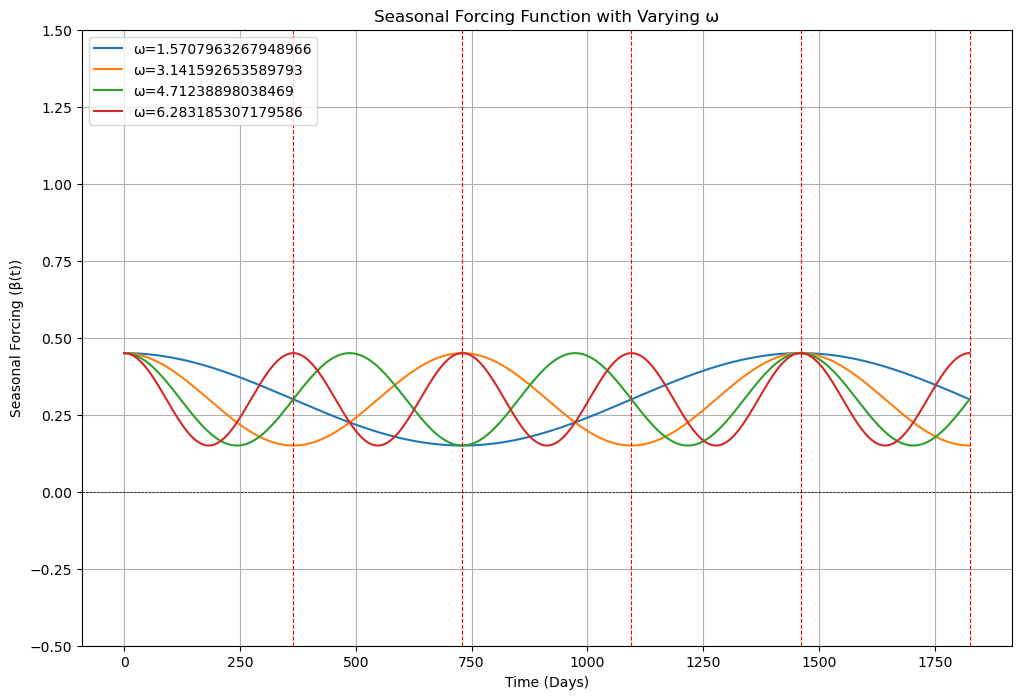

In [14]:
# Define time over one year in days (e.g., 0 to 365 days)
t = np.linspace(0, 365*5, 365*5)  # 365 days

# Set constant parameters
beta0 = 0.3
beta1 = 0.5
omega = 2 *np.pi  # Angular frequency - yearly
psi = 0  # No phase shift

# Varying beta0
omega_values = [np.pi/2, np.pi, 3/2*np.pi, 2*np.pi]  # Different baseline values

# Create a plot
plt.figure(figsize=(12, 8))

# Plot seasonal forcing functions for different beta0 values
for omega in omega_values:
    forcing = seasonal_forcing(beta0, beta1, omega, psi, t)
    plt.plot(t, forcing, label=f"ω={omega}")

# Add vertical lines at multiples of 365
for year in range(1, 6):  # For 1 to 5 years
    plt.axvline(x=year * 365, color='red', linestyle='--', linewidth=0.8)


# Customizing the plot
plt.title('Seasonal Forcing Function with Varying ω')
plt.xlabel('Time (Days)')
plt.ylabel('Seasonal Forcing (β(t))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid()
plt.ylim(-0.5, 1.5)
plt.show()

## Varying the phase of the seasonal wave $\phi$

The $\phi$ parameter shifts the wave within the year. This parameter needs to be supplied as a number of days between [0.365].

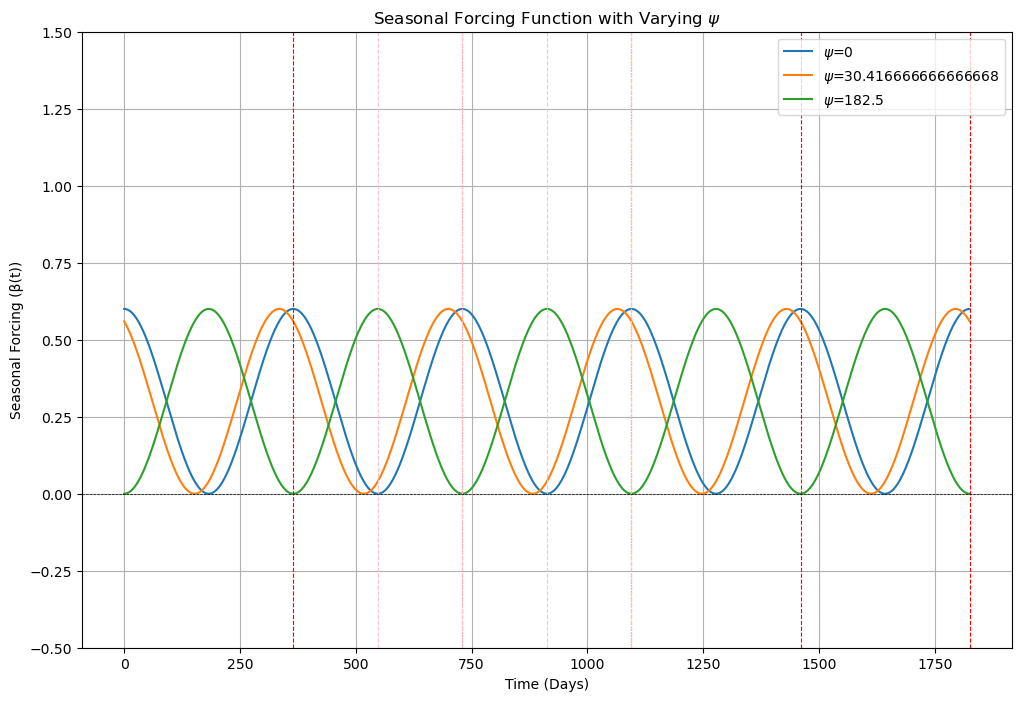

In [15]:
# Define time over one year in days (e.g., 0 to 365 days)
t = np.linspace(0, 365*5, 365*5)  # 365 days

# Set constant parameters
beta0 = 0.3
beta1 = 1.0
omega = 2 *np.pi  # Angular frequency - yearly

# Varying beta0
psi_values = [0, 365/12, 365/2]  # Different baseline values 0, 1 month, 6 months

# Create a plot
plt.figure(figsize=(12, 8))

# Plot seasonal forcing functions for different beta0 values
for psi in psi_values:
    forcing = seasonal_forcing(beta0, beta1, omega, psi, t)
    plt.plot(t, forcing, label=f"$\psi$={psi}")

# Add vertical lines at multiples of 365
for year in range(1, 6):  # For 1 to 5 years
    plt.axvline(x=(year+1) * 365/2, color='pink', linestyle='--', linewidth=0.8)
    plt.axvline(x=year * 365, color='red', linestyle='--', linewidth=0.8)


# Customizing the plot
plt.title('Seasonal Forcing Function with Varying $\psi$')
plt.xlabel('Time (Days)')
plt.ylabel('Seasonal Forcing (β(t))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid()
plt.ylim(-0.5, 1.5)
plt.show()